# Dataset information

1. You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
2. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

# Problem Statement

1. You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import mglearn
import warnings
warnings.simplefilter(action='ignore')


In [36]:
df = pd.read_csv(r'G:\MINOR PROJECT 2020 SEM 6TH\Mall Customer Segregation\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
df.columns = ['customer_ID','gender','age','annual_income','spending_score']
df.head()

,customer_ID,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
df.shape


(200, 5)

In [39]:
df.info

<bound method DataFrame.info of      customer_ID  gender  age  annual_income  spending_score
0              1    Male   19             15              39
1              2    Male   21             15              81
2              3  Female   20             16               6
3              4  Female   23             16              77
4              5  Female   31             17              40
..           ...     ...  ...            ...             ...
195          196  Female   35            120              79
196          197  Female   45            126              28
197          198    Male   32            126              74
198          199    Male   32            137              18
199          200    Male   30            137              83

[200 rows x 5 columns]>

In [40]:
df.duplicated().any()

False

In [41]:
df.isnull().any()

customer_ID       False
gender            False
age               False
annual_income     False
spending_score    False
dtype: bool

In [42]:
df = df.set_index(['customer_ID'])
df.head()

,gender,age,annual_income,spending_score
customer_ID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


# Explanatory Data analysis


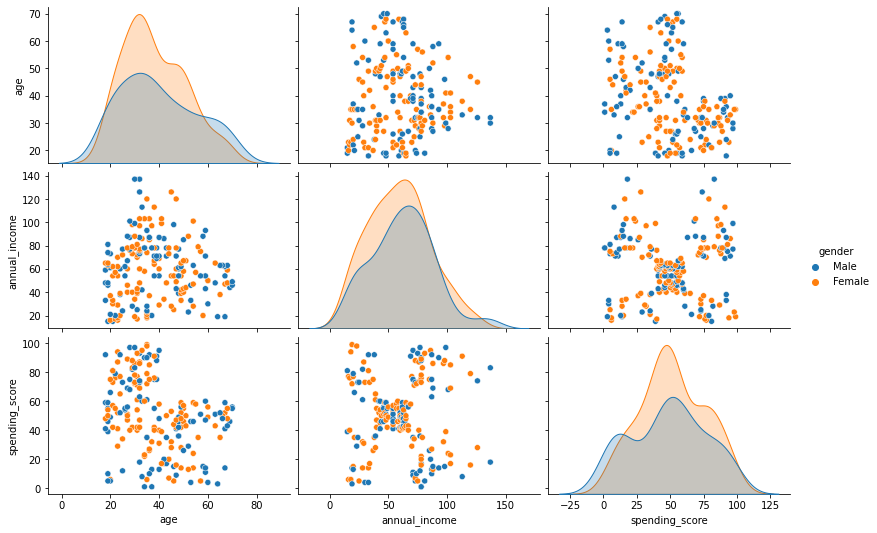

In [43]:
sns.pairplot(df,hue='gender',aspect=1.5)
plt.show()

# Clustering

In [44]:
X = df.drop(['gender'],axis = 1)
X.head()

,age,annual_income,spending_score
customer_ID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


# K-Means Clustering


In [45]:
#mglearn.plots.plot_kmeans_algorithm()

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusters = []
ss = []

for i in range(2,15):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)
    ss.append(silhouette_score(X,kmeans.labels_,metric = 'euclidean'))

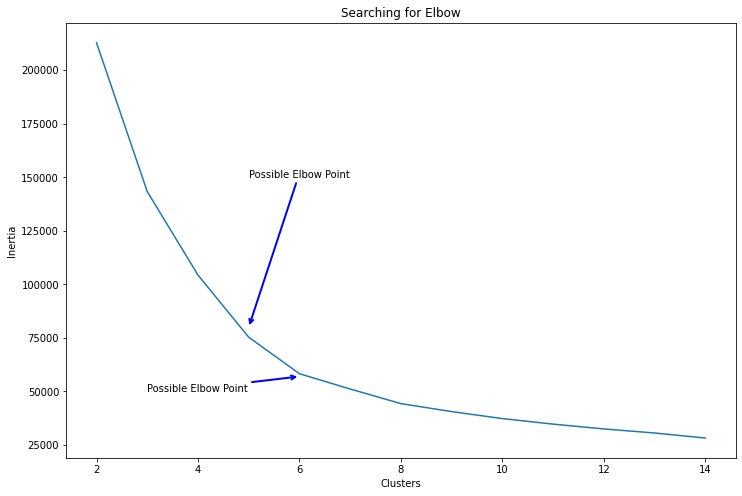

In [47]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(2, 15)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(6, 57000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

Text(0, 0.5, 'Silhouette Score')

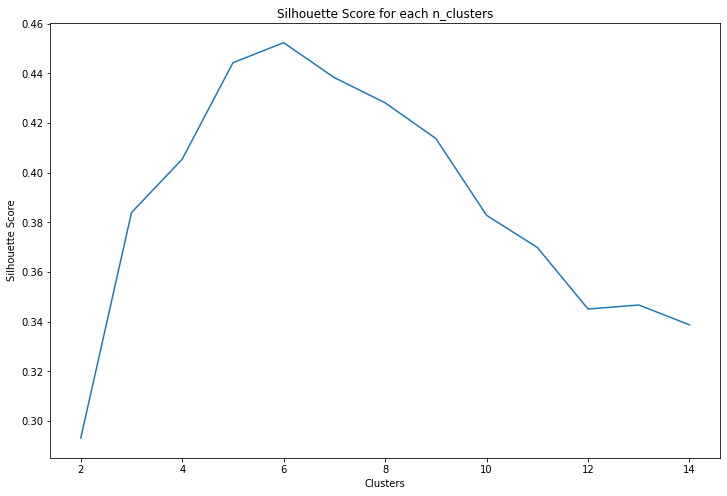

In [48]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(2, 15)), y=ss, ax=ax)
ax.set_title('Silhouette Score for each n_clusters')
ax.set_xlabel('Clusters')
ax.set_ylabel('Silhouette Score')

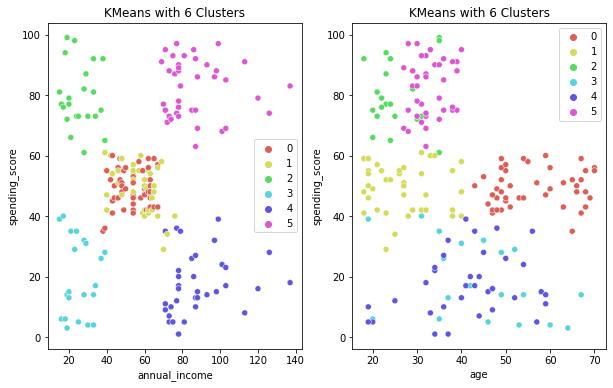

In [49]:
km6 = KMeans(n_clusters=6).fit(X)

X['Labels'] = km6.labels_

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121)
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 6))
ax.set_title('KMeans with 6 Clusters')
ax.legend(loc='center right')


ax = fig.add_subplot(122)
sns.scatterplot(X['age'], X['spending_score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 6))
ax.set_title('KMeans with 6 Clusters')
ax.legend(loc='upper right')

plt.show()

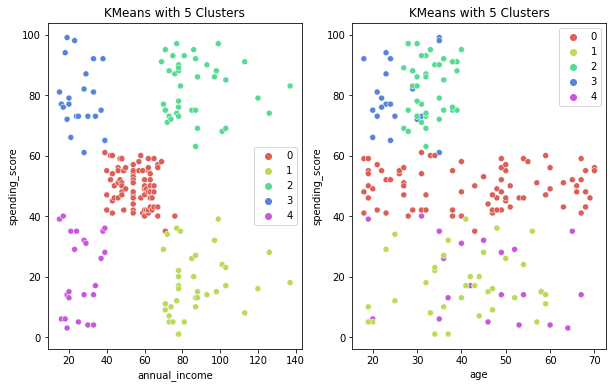

In [50]:
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121)
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('KMeans with 5 Clusters')
ax.legend(loc='center right')


ax = fig.add_subplot(122)
sns.scatterplot(X['age'], X['spending_score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('KMeans with 5 Clusters')
ax.legend(loc='upper right')
plt.show()

- __As compare to the 6 clusters plot, 5 clusters can better differentiate each of the subgroups. The five groups are:__
 1. Low income with low spending score(Cluster 1)
 2. Low income with high spending score(Cluster 2)
 3. Medium income with medium spending score(Cluster 0)
 4. High income with low spending score(Cluster 4)
 5. High income with high spending score(Cluster 3)

Text(0, 0.5, 'Feature 1')

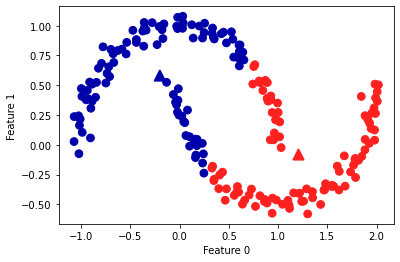

In [51]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
y_pred = kmeans.predict(x)
  

plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- We can clearly see KMeans fail to cluster correctly the above two half-moon shaped datas because their distribution of data is not spherical.

### 2. Hierachical clustering(Agglomerative approach)

In [52]:
#mglearn.plots.plot_agglomerative_algorithm()

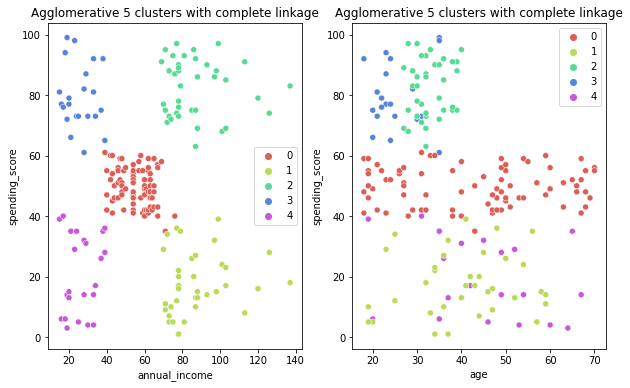

In [53]:
from sklearn.cluster import AgglomerativeClustering 

aggloclus = AgglomerativeClustering(n_clusters=5, linkage='complete').fit(X)

labels = aggloclus.labels_
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121)
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('Agglomerative 5 clusters with complete linkage')
ax.legend(loc='center right')


ax = fig.add_subplot(122)
sns.scatterplot(X['age'], X['spending_score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('Agglomerative 5 clusters with complete linkage')
ax.legend(loc='upper right')
plt.show()

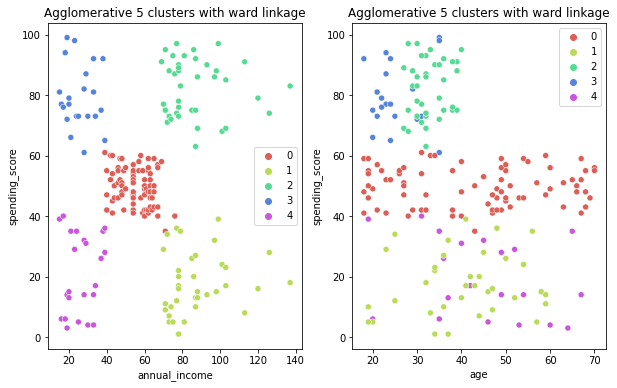

In [54]:
from sklearn.cluster import AgglomerativeClustering 

aggloclus = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(X)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121)
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('Agglomerative 5 clusters with ward linkage')
ax.legend(loc='center right')


ax = fig.add_subplot(122)
sns.scatterplot(X['age'], X['spending_score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('Agglomerative 5 clusters with ward linkage')
ax.legend(loc='upper right')
plt.show()

#### Dendrogram

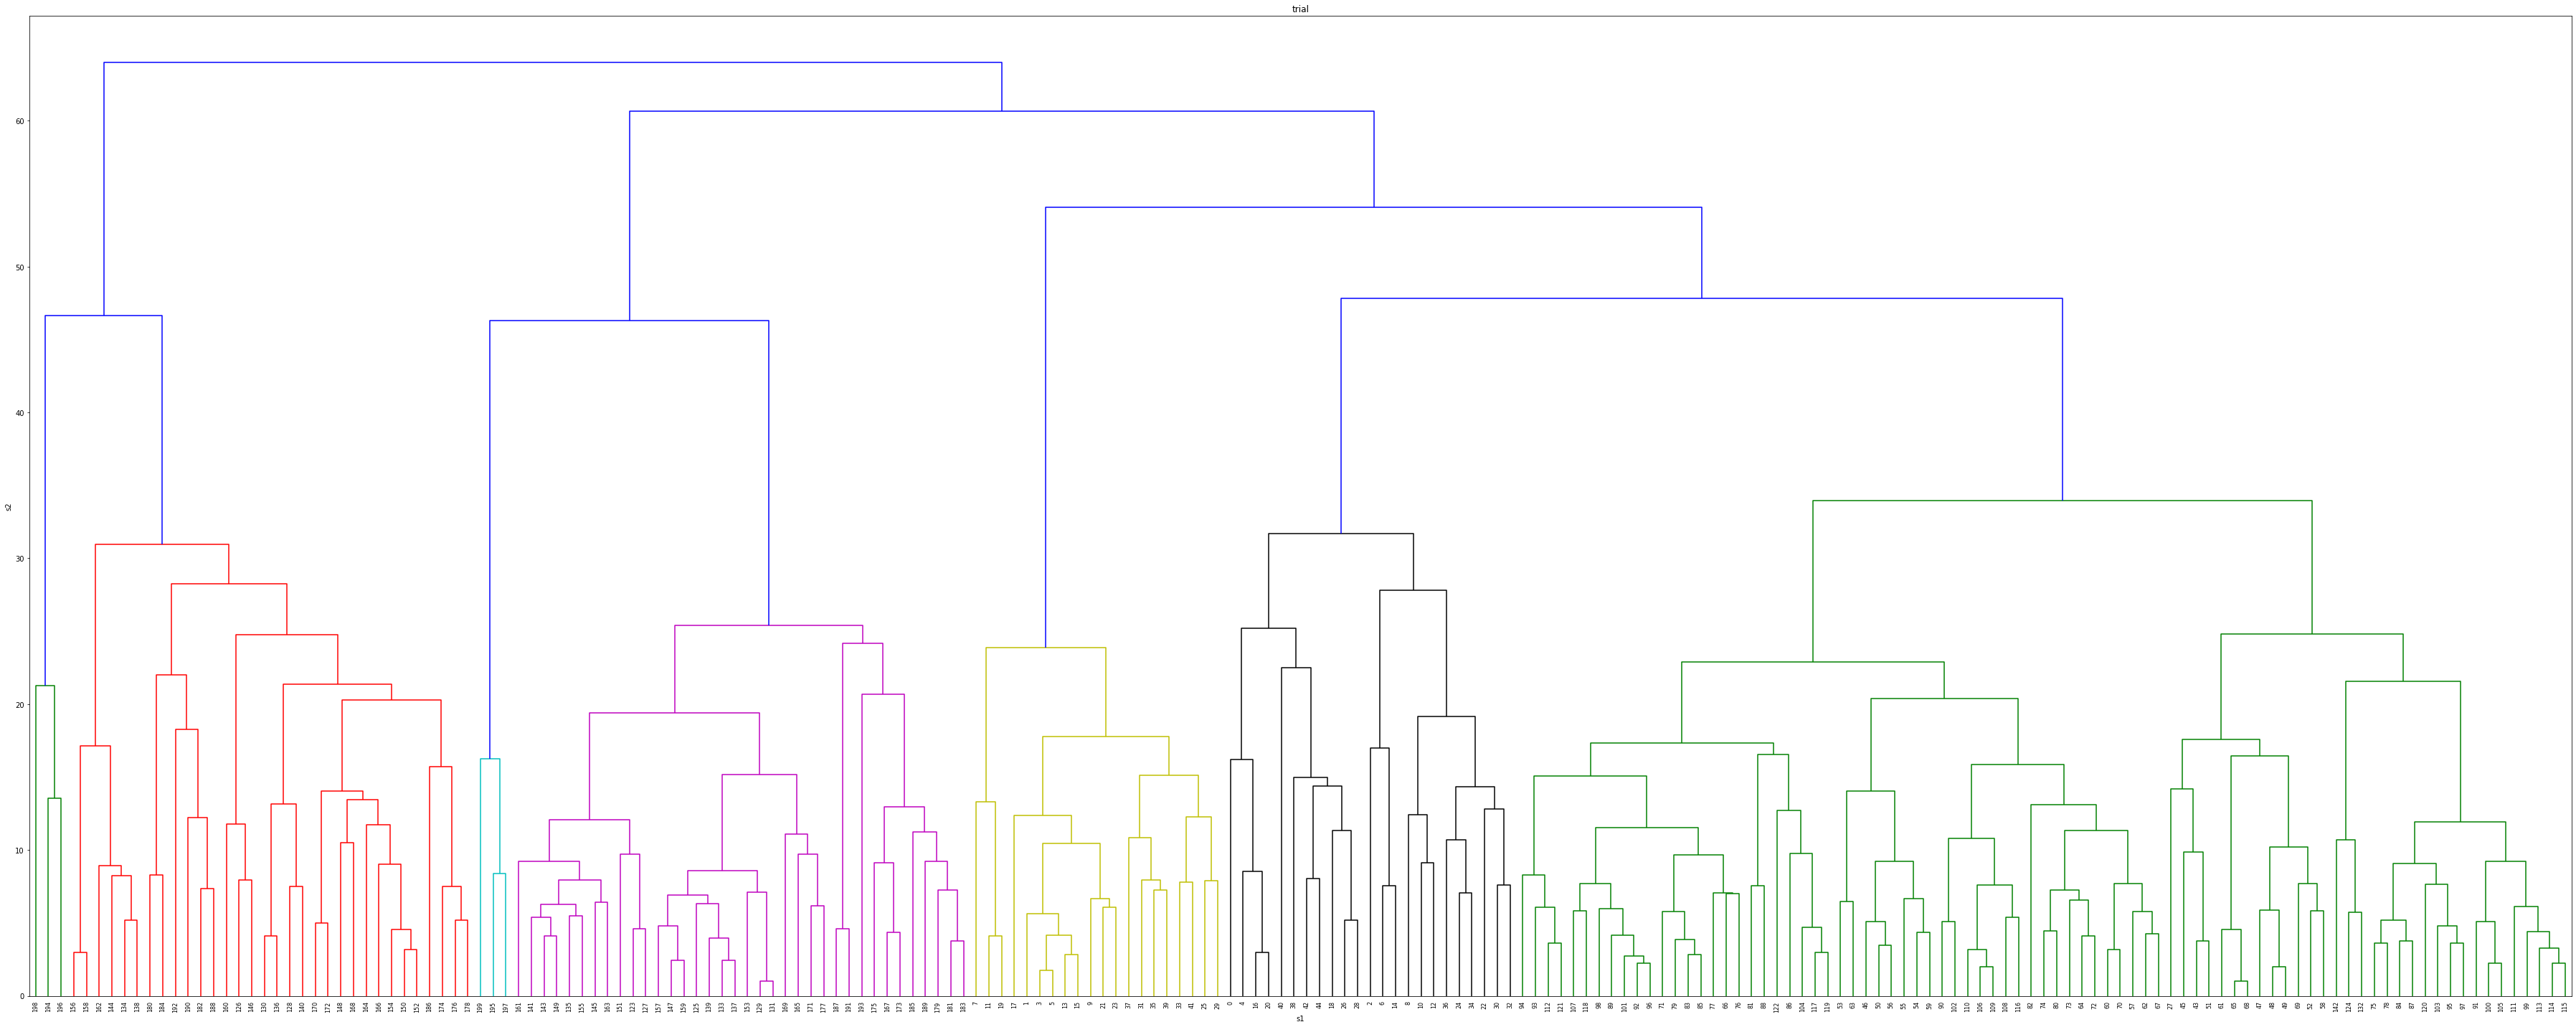

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

Z=linkage(X, metric='euclidean', method='average')

plt.figure(figsize=[50,20])
plt.title('trial')
plt.xlabel('s1')
plt.ylabel('s2')
dendrogram(Z, leaf_rotation=90,color_threshold=40,leaf_font_size=8)
plt.tight_layout()

In [56]:
from sklearn.cluster import AgglomerativeClustering 

aggloclus = AgglomerativeClustering(n_clusters=5, linkage='complete').fit(X)
aggloclus.fit(X)
X['labels']=aggloclus.labels_
print(X)


             age  annual_income  spending_score  Labels  labels
customer_ID                                                    
1             19             15              39       4       4
2             21             15              81       3       3
3             20             16               6       4       4
4             23             16              77       3       3
5             31             17              40       4       4
...          ...            ...             ...     ...     ...
196           35            120              79       2       2
197           45            126              28       1       0
198           32            126              74       2       2
199           32            137              18       1       0
200           30            137              83       2       2

[200 rows x 5 columns]


In [57]:
kk=X.groupby(['labels'])
kk.mean()

,age,annual_income,spending_score,Labels
labels,,,,
0,41.685714,88.228571,17.285714,0.971429
1,42.156627,54.759036,49.771084,0.096386
2,32.692308,86.538462,82.128205,2.000000
3,24.850000,24.950000,81.000000,3.000000
4,45.217391,26.304348,20.913043,4.000000


Text(0, 0.5, 'Feature 1')

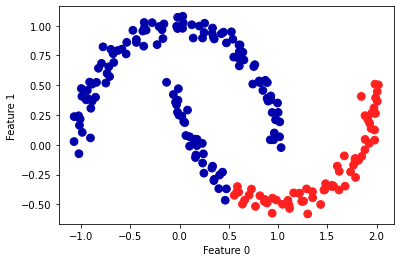

In [58]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
agglo =  AgglomerativeClustering(n_clusters=2, linkage='average')
y_pred = agglo.fit_predict(x)

  

plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- __As we can see from the plot above, agglomerative clustering does not deal well with the half-moon-shaped data when we use 'average' linkage.__

Text(0, 0.5, 'Feature 1')

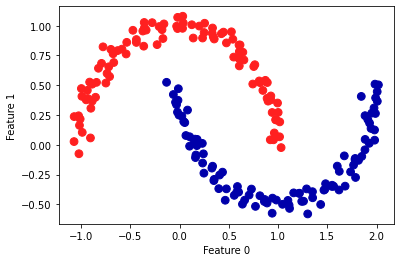

In [59]:
agglo =  AgglomerativeClustering(n_clusters=2, linkage='single')
y_pred = agglo.fit_predict(x)

  

plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

 - __However, we can correctly clusters the half-moon-shaped data when we use 'single' linkage. This is because 'single' use the minimum distance to identify similar clusters and the gap between the two real clusters are big.__

### 3. DBSCAN(Density Based Spatial Clustering of Application with Noise)

In [60]:
#mglearn.plots.plot_dbscan()

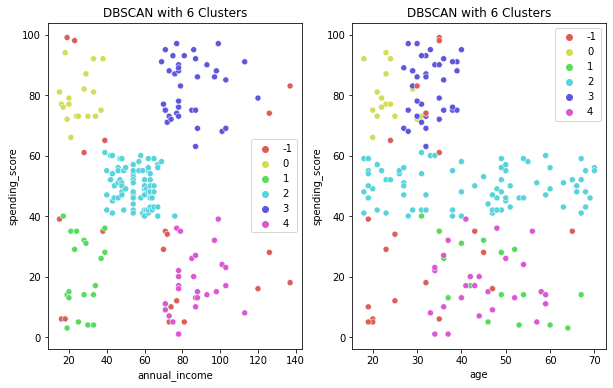

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps = 0.7, min_samples = 5)
clusters = dbscan.fit_predict(X_scaled)
length = len(np.unique(clusters))
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121)
sns.scatterplot(X['annual_income'], X['spending_score'], hue=clusters, 
                palette=sns.color_palette('hls', length))
ax.set_title('DBSCAN with 6 Clusters')
ax.legend(loc='center right')


ax = fig.add_subplot(122)
sns.scatterplot(X['age'], X['spending_score'], hue=clusters, 
                palette=sns.color_palette('hls', length))
ax.set_title('DBSCAN with 6 Clusters')
ax.legend(loc='upper right')
plt.show()

In [62]:
from itertools import product

eps_values = np.arange(0.3,1.6,0.1) # eps values to be investigated
min_samples = np.arange(3,8) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_scaled)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_scaled, DBS_clustering.labels_))



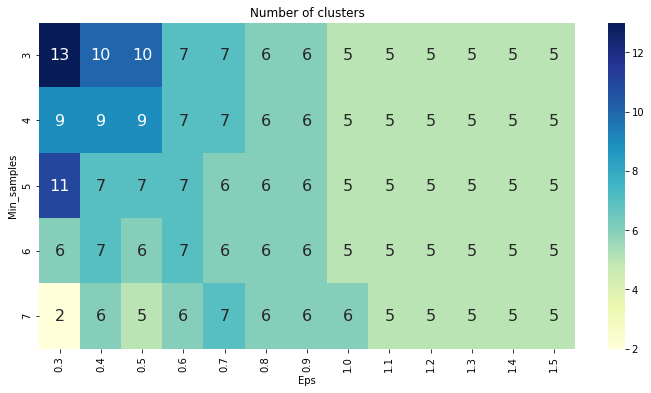

In [63]:
from matplotlib.ticker import FormatStrFormatter

tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels([str(round(float(label), 2)) for label in labels])
ax.set_title('Number of clusters')
plt.show()

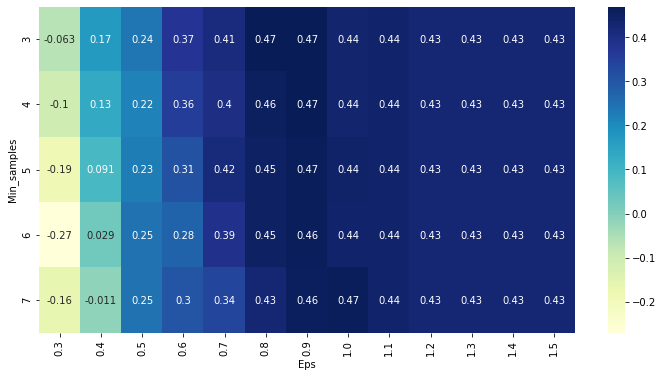

In [64]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels([str(round(float(label), 2)) for label in labels])
plt.show()

Text(0, 0.5, 'Feature 1')

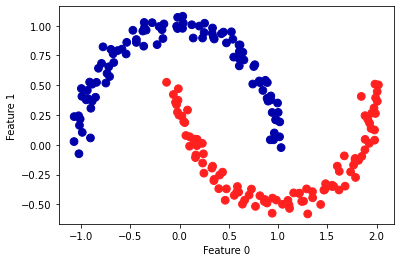

In [65]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

x_scaled = scaler.fit_transform(x)
# cluster the data into two clusters
dbscan = DBSCAN(eps=0.3, min_samples=3) 
y_pred = dbscan.fit_predict(x_scaled)
  
plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- __DBSCAN can perfectly classify this complex shaped data because it is a density-based algorithm and the two distinct clusters can be seen to have higher density data region of their own cluster seperated by gap without any datas(low density). It is also very flexible since we can always change eps and min_samples.__